In [168]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

# Define constants
c = 3.00*(10**8)
h_bar = (6.63*10**-34)/(2*np.pi)
m_n = 1.6749*10**(-27)
m_e = (9.11*10**-31)
G = 6.67*10**-11

K_rel = 1/3
K_nrel = ((h_bar**2)/(15*np.pi**2*m_n))*(3*np.pi**2/(m_n*c**2))**(5/3)

Densities = np.linspace(10**17, 10**19, 40)
E_Densities = Densities*c**2

# Fermi momentum  for pure neutrons

k_F = h_bar*((3*Densities*np.pi**2)/m_n)**(1/3)


print(m_n*c)

5.0247e-19


In [169]:
def Central_Pressures(t):
    P_Central = []
    for i in range (0, len(k_F)):
        if k_F[i] > m_n*c:
            P_c = K_rel*E_Densities[i]
        else:
            P_c = K_nrel*(E_Densities[i])**(5/3)
        P_Central = P_Central + [P_c]
    return P_Central

print(Central_Pressures(0))

[1.1605778980592438e+32, 9.535974797360046e+32, 2.348625979837536e+33, 4.2020906101807247e+33, 6.462224560004255e+33, 9.094986225324276e+33, 1.20755281302393e+34, 1.5384560205506808e+34, 1.9006478421362015e+34, 2.2928282894948966e+34, 2.713890006936893e+34, 3.1628732145768197e+34, 3.63893436054026e+34, 4.141323505573844e+34, 4.669367517792187e+34, 5.22245727387961e+34, 5.8000377067755e+34, 6.401599927664516e+34, 7.02667489290309e+34, 7.6748282436461185e+34, 8.345656050571064e+34, 9.038781267533872e+34, 9.753850747850664e+34, 1.049053271238801e+35, 1.8576923076923075e+35, 1.933846153846154e+35, 2.01e+35, 2.086153846153846e+35, 2.1623076923076922e+35, 2.2384615384615387e+35, 2.3146153846153848e+35, 2.3907692307692305e+35, 2.4669230769230766e+35, 2.5430769230769234e+35, 2.619230769230769e+35, 2.6953846153846152e+35, 2.7715384615384617e+35, 2.8476923076923077e+35, 2.923846153846154e+35, 2.9999999999999995e+35]


In [170]:
# dM and dP (Create two sets , Rel and N_Rel)

def dM_dr_rel(P, m, r):
    dMdr = (12*np.pi*r**2*P)/(c**2)
    return dMdr

def dM_dr_nrel(P, m, r):
    dMdr = 4*np.pi*r**2*P**(3/5)/(c**2*K_nrel**(3/5))
    return dMdr

def dP_dr_rel(P, m, r):
    dPdr = (-3*G*m*P/(c**2*r**2))
    return dPdr

def dP_dr_nrel(P, m, r):
    dPdr = (-G*m*P**(3/5)/(c**2*r**2*K_nrel**(3/5)))*(1+(P**(2/5)*K_nrel**(3/5)))*(1+((4*np.pi*P*r**3)/(m*c**2)))*(1-((2*G*m)/(r*c**2)))**(-1)
    return dPdr

2.6953169549662438e+35
2.6952492913121396e+35
2.6951645534666168e+35
2.6950591187948434e+35
2.694932071398511e+35
2.694783046032972e+35
2.6946118628123693e+35
2.6944184221022733e+35
2.6942026649421236e+35
2.6939645554067688e+35
2.693704071769544e+35
2.693421201674588e+35
2.6931159393170124e+35
2.6927882837055816e+35
2.6924382375445783e+35
2.6920658064874688e+35
2.6916709986230806e+35
2.6912538241122936e+35
2.690814294925099e+35
2.6903524246463376e+35
2.6898682283295085e+35
2.689361722384904e+35
2.6888329244926933e+35
2.688281853534435e+35
2.6877085295383898e+35
2.6871129736353082e+35
2.686495208022261e+35
2.6858552559327046e+35
2.6851931416114337e+35
2.6845088902933925e+35
2.68380252818556e+35
2.6830740824512973e+35
2.6823235811966844e+35
2.6815510534584698e+35
2.680756529193335e+35
2.679940039268238e+35
2.6791016154516413e+35
2.6782412904054724e+35
2.6773590976776865e+35
2.67645507169533e+35
2.675529247758019e+35
2.6745816620317624e+35
2.6736123515430683e+35
2.6726213541732858e+35
2.6

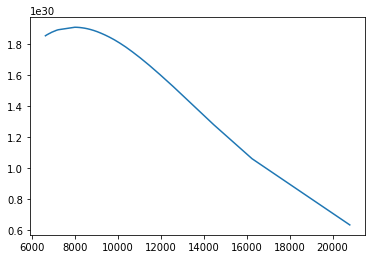

In [172]:
# Integrate

def integrate_rel(P, m): # Create Rel and N_Rel versions
    end = False
    r = 1
    step = 10
    Masses = []
    Pressures = []
    while end == False:
        slope_m = (dM_dr_rel(P, m, r)) 
        m = m + slope_m * step
        slope_P = (dP_dr_rel(P, m, r))
        P = P + slope_P * step
        print(P)
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        r = r + step
        if r > 1000:
            break
    return m, r

def integrate_nrel(P, m): # Create Rel and N_Rel versions
    end = False
    r = 1
    step = 10
    Masses = []
    Pressures = []
    while end == False:
        slope_m = dM_dr_nrel(P, m, r) 
        m = m + slope_m * step
        slope_P = dP_dr_nrel(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        r = r + step
    return m, r

# Function to loop over all central pressures

def results(P, m):
    M_maxs = []
    Radii = []
    for i in range(0, len(P)):
        M_max, Radius = integrate_nrel(P[i], m)
        M_maxs = M_maxs + [M_max]
        Radii = Radii + [Radius]
    return M_maxs, Radii

# Plot 

print(integrate_rel(2.6953846153846152e+35, 0))


x, y = results(Central_Pressures(0), 0)

plt.plot(y, x)

In [124]:
for i in range(0, len(P)):
        if k_F[i] > m_n*c:
            M_max, Radius = integrate_rel(P[i], m)
        else
        
*(1+(P**(2/5)*K_nrel**(3/5)))*(1+((4*np.pi*P*r**3)/(m*c**2)))*(1-((2*G*m)/(r*c**2)))**(-1)

((h_bar*c)/(12*np.pi**2))*((3*np.pi**2)/(m_n*c**2))**(5/3)

*(1+K_rel)*(1+((4*np.pi*P*r**3)/(m*c**2)))*(1-((2*G*m)/(r*c**2)))**(-1)

SyntaxError: invalid syntax (<ipython-input-124-70be49332da0>, line 4)